In [1]:
import sys
sys.path.append("..")  # this is so we can import ethicml from the parent directory

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, Kamiran
from ethicml.algorithms.preprocess import Calders, Upsampler
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit
from ethicml.evaluators import load_results, evaluate_models
from ethicml.data import Adult
from ethicml.visualisation import plot_results
from ethicml.utility import Results

In [ ]:
results = evaluate_models(
    datasets=[
        Adult(),
        Adult("Race-Binary"),
    ],
    inprocess_models=[
        LR(),
        SVM(),
        Majority(),
        Kamiran(),
        Kamiran(classifier="SVM"),
    ],
    preprocess_models=[
        Calders(preferable_class=1, disadvantaged_group=0),
        Upsampler(),
        Upsampler("preferential"),
        Upsampler("naive"),
    ],
    metrics=[Accuracy(), AbsCV(), F1(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
    per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    repeats=5,
    delete_prev=False,
    splitter=BalancedTestSplit(),
    topic="kamiran_calders_variants",
    fair_pipeline=False
)

  2%|▏         | 5/290 [00:02<02:18,  2.05it/s, model=SVM, dataset=Adult Sex, transform=no_transform, repeat=0]                       

In [13]:
results.data

Accuracy  ...  prob_pos_race_White_1
dataset           transform             model                      split_id            ...                       
Adult Sex         no_transform          Logistic Regression, C=1.0 0         0.898775  ...                    NaN
                                        SVM                        0         0.909323  ...                    NaN
                                        Majority                   0         0.886356  ...                    NaN
                                        Kamiran & Calders LR       0         0.899626  ...                    NaN
                                        Logistic Regression, C=1.0 1         0.894182  ...                    NaN
...                                                                               ...  ...                    ...
Adult Race-Binary Upsample uniform      SVM                        0         0.897547  ...               0.136076
                                        Majority                   0         0.841772  ...               0.000000
                  Upsample preferential Logistic Regression, C=1.0 0         0.878956  ...               0.160601
                                        SVM                        0         0.898339  ...               0.157437
                                        Majority                   0         0.841772  ...               0.000000

[94 rows x 41 columns]

In [16]:
(fig1, _), = plot_results(results, "Accuracy", "prob_pos_sex_Male_0/sex_Male_1", transforms_separately=False, ptype="cross")

[(<Figure size 1800x1200 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fc631317e50>)]

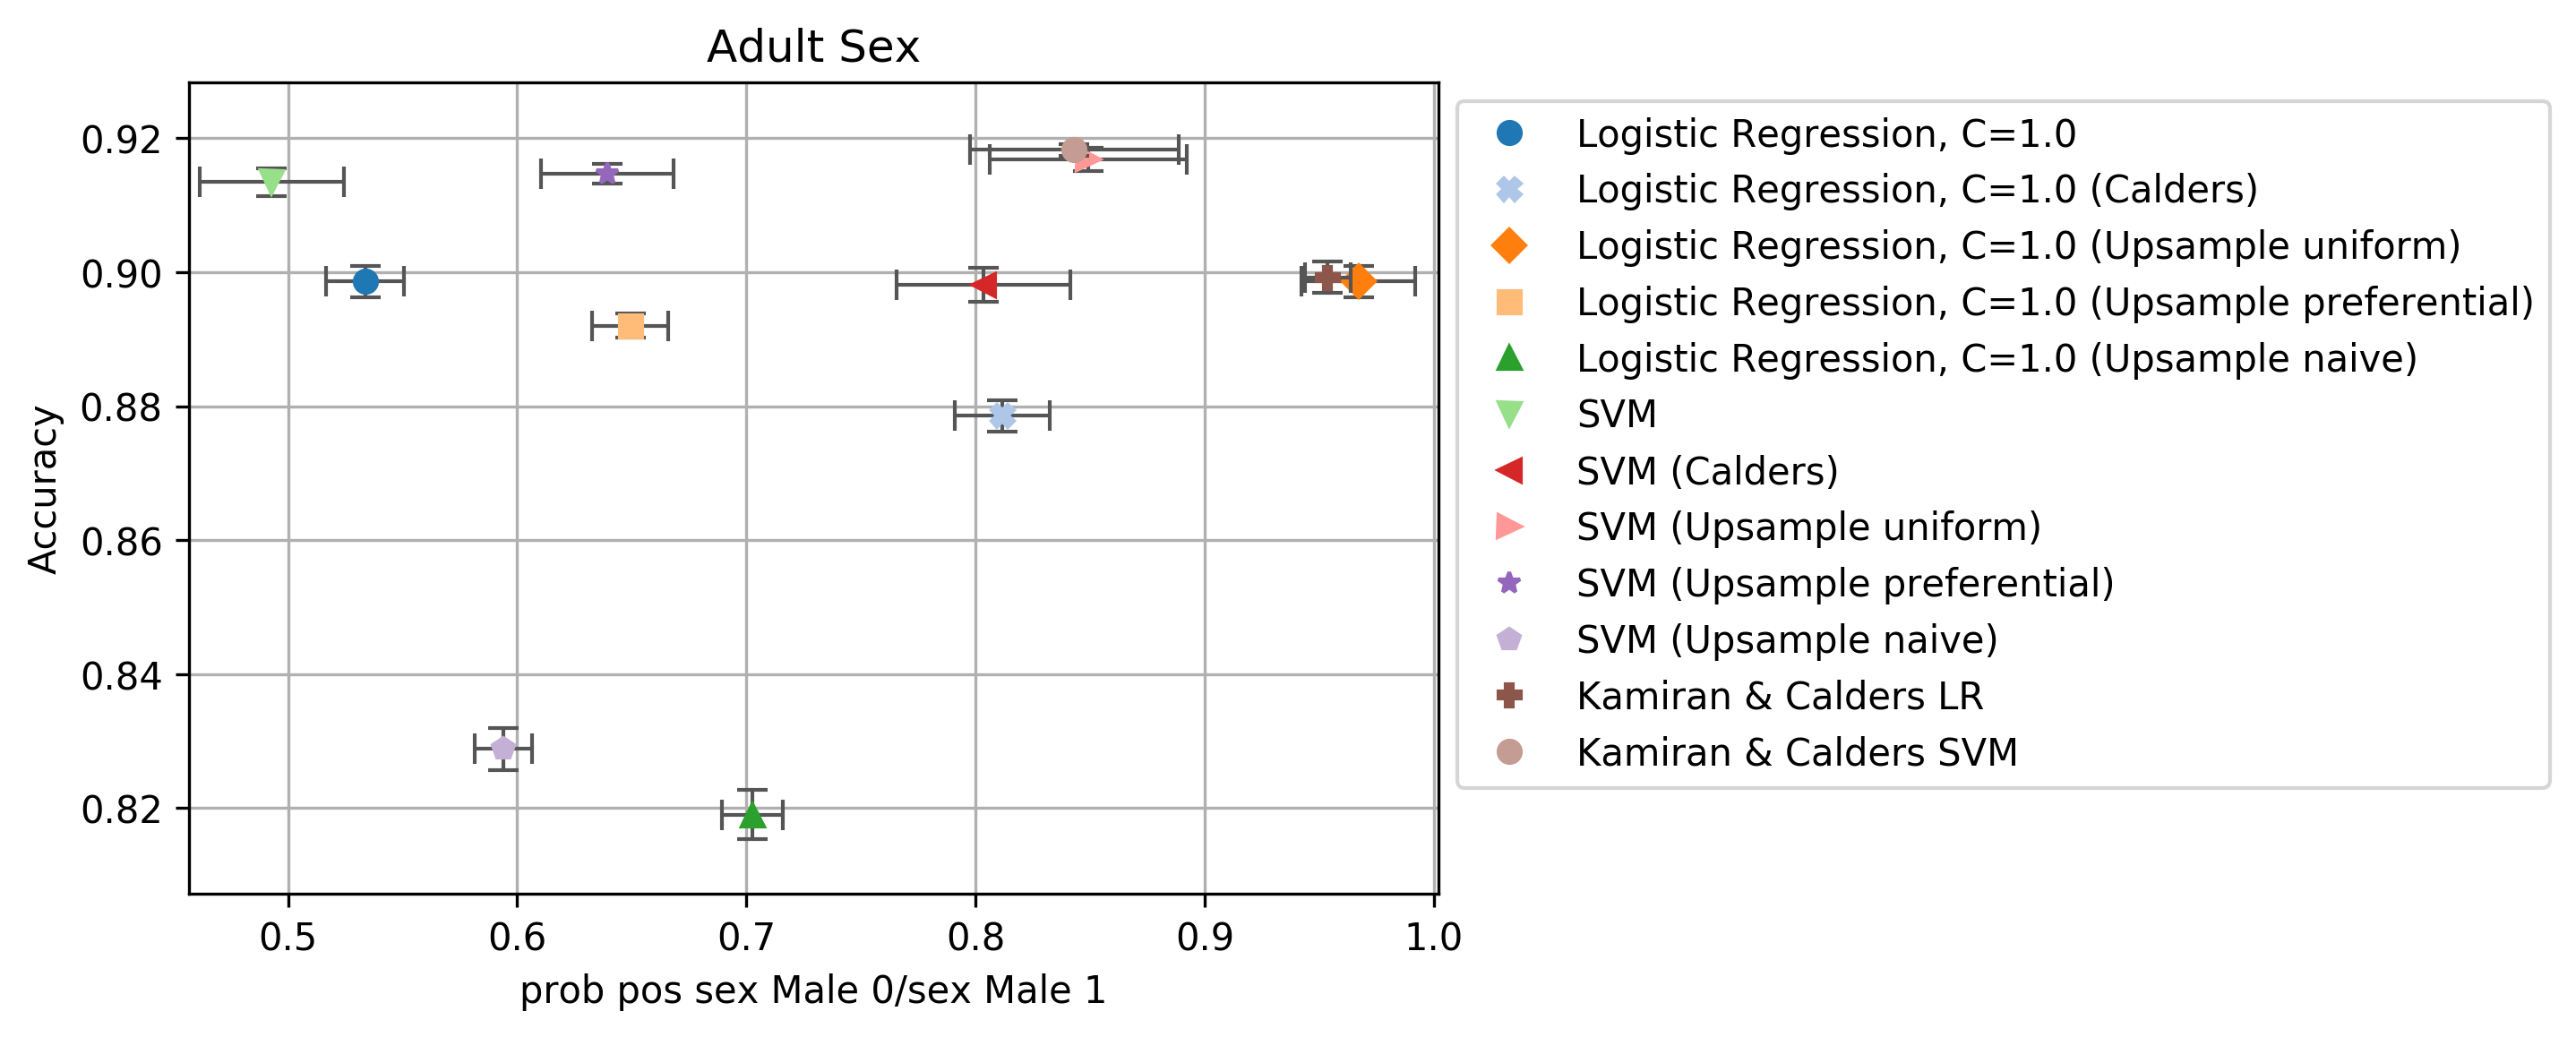

In [15]:
fig1

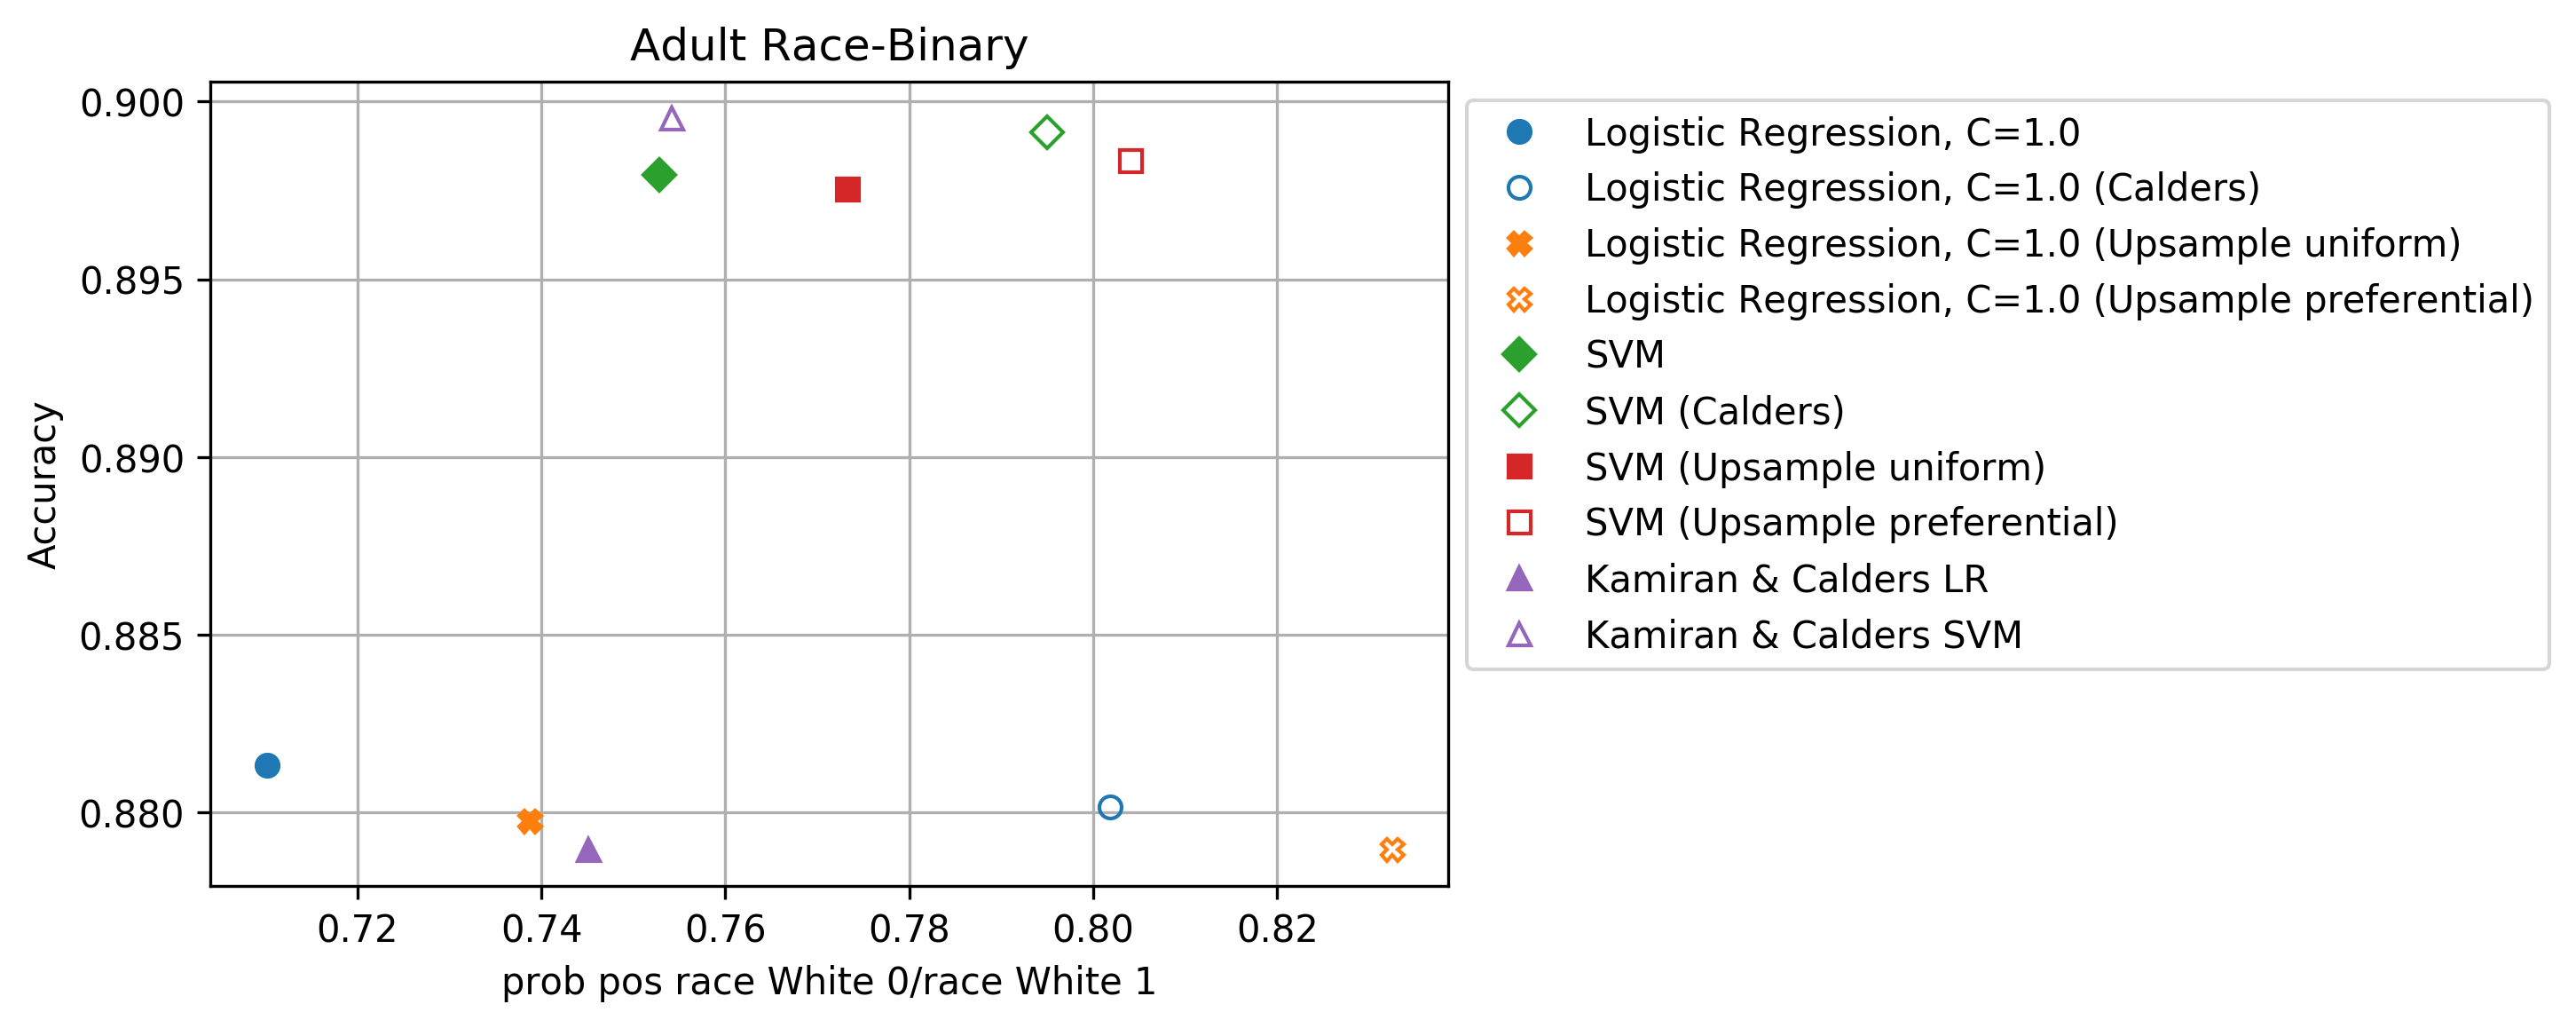

In [18]:
(fig2, _), = plot_results(results, "Accuracy", "prob_pos_race_White_0/race_White_1", transforms_separately=False, ptype="scatter")
fig2